# Статистика, DS-поток
## Задание SP.6

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash;  70 баллов
* Задача 2 &mdash;  50 баллов
* Задача 3 &mdash;  200 баллов

**Важность задач:**

* *высокая:* задачи 1, 2, 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

Почему все задачи высокой степени? Просто остальные убрали :)

In [373]:
# Bot check

# HW_ID: ds_sp6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [374]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

from tqdm import tqdm


sns.set(font_scale=1.2, palette="Set2")

______________
### Задача 1.
В этой задаче нужно сделать оценку максимального правдоподобия для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.
Скачайте данные по ссылке https://archive.ics.uci.edu/ml/datasets/wine (файл `wine.data`) и загрузите их с помощью библиотеки pandas.

In [375]:
  
wine = fetch_ucirepo(id=109) 
  
data_X = wine.data.features 
data_y = wine.data.targets 

data_X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Пусть выборка $X = (X_1, ..., X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со средним вектором $a \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.

Запишите оценку максимального правдоподобия для параметров $a$ и $\Sigma$.

**Ответ:** Из ST.5 знаем $a_{ОМП} = \overline{X}, \Sigma_{ОМП} = \frac{1}{n} \sum\limits_{i=1}^{n}(X_i - \overline{X})(X_i - \overline{X})^T$

Рассмотрим колонки "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue" для всех сортов вина вместе.
Предположим, что данные в них образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что данные визуально похожи на нормальное распределение:

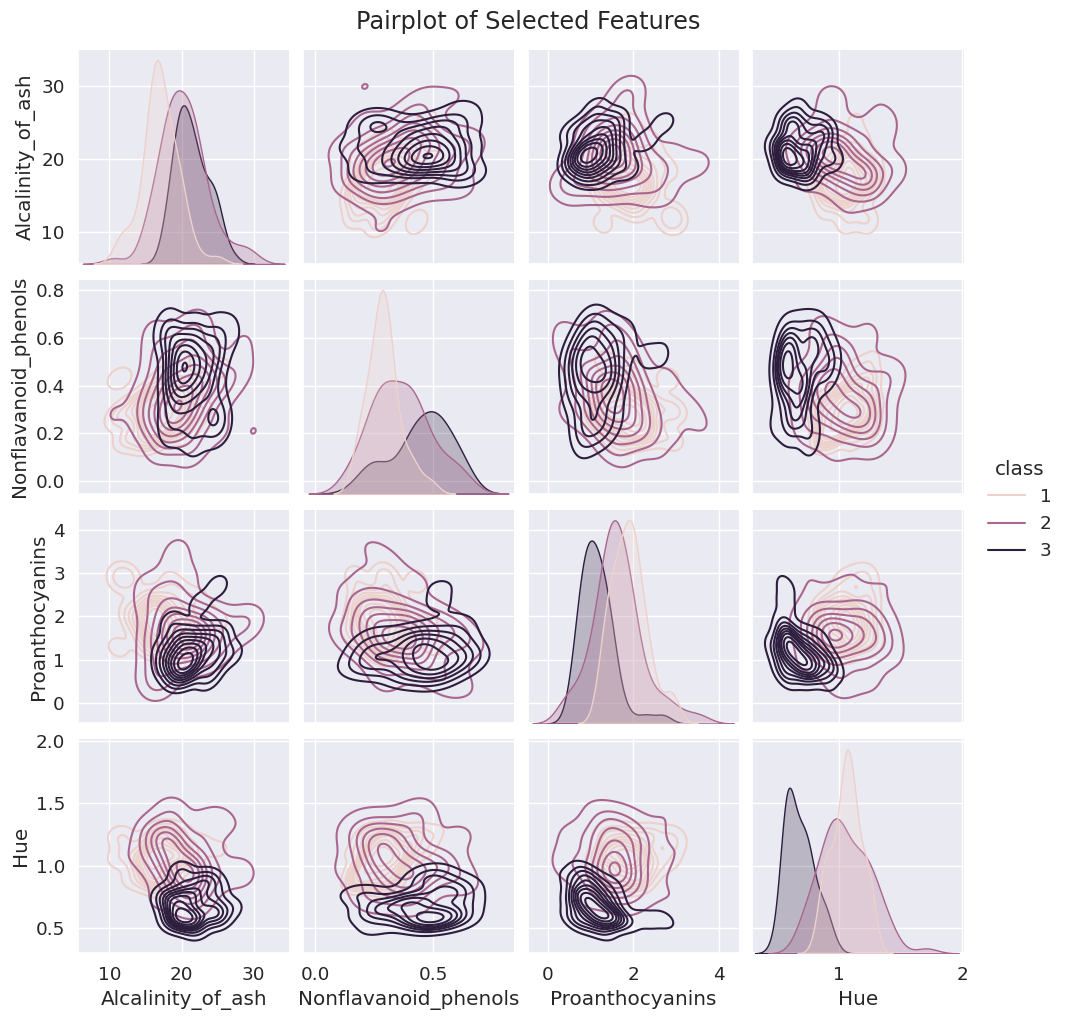

In [376]:
X = data_X[["Alcalinity_of_ash", "Nonflavanoid_phenols", "Proanthocyanins", "Hue"]]
tmp_data = pd.concat([X, data_y], axis=1)


pairplot = sns.pairplot(tmp_data, kind="kde", hue="class",  markers=["o", "s", "D"], height=2.5)
pairplot.fig.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

Как видим, распределение действительно нормальное

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $a$ и матрицы ковариаций $\Sigma$ по выборке. Использование циклов наказуемо.

In [377]:
def mle_for_mean(sample):
    '''
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    '''

    return np.mean(sample, axis=0)

In [378]:
def mle_for_covariance_matrix(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    """

    mean = mle_for_mean(sample).reshape(-1, 1)

    return (sample.T - mean) @ (sample.T - mean).T / sample.shape[0]

In [379]:
a = mle_for_mean(X.to_numpy())
sigma = mle_for_covariance_matrix(X.to_numpy())

Визуализируйте полученный результат. Для каждой пары признаков постройте информативный график, на котором будут:

1. Точки выборки.

2. Плотность нормального распределения с оцененными параметрами, которую изобразите в виде линий уровня.

*Указание.* Используйте функции `plt.pcolormesh` и `plt.clabel`

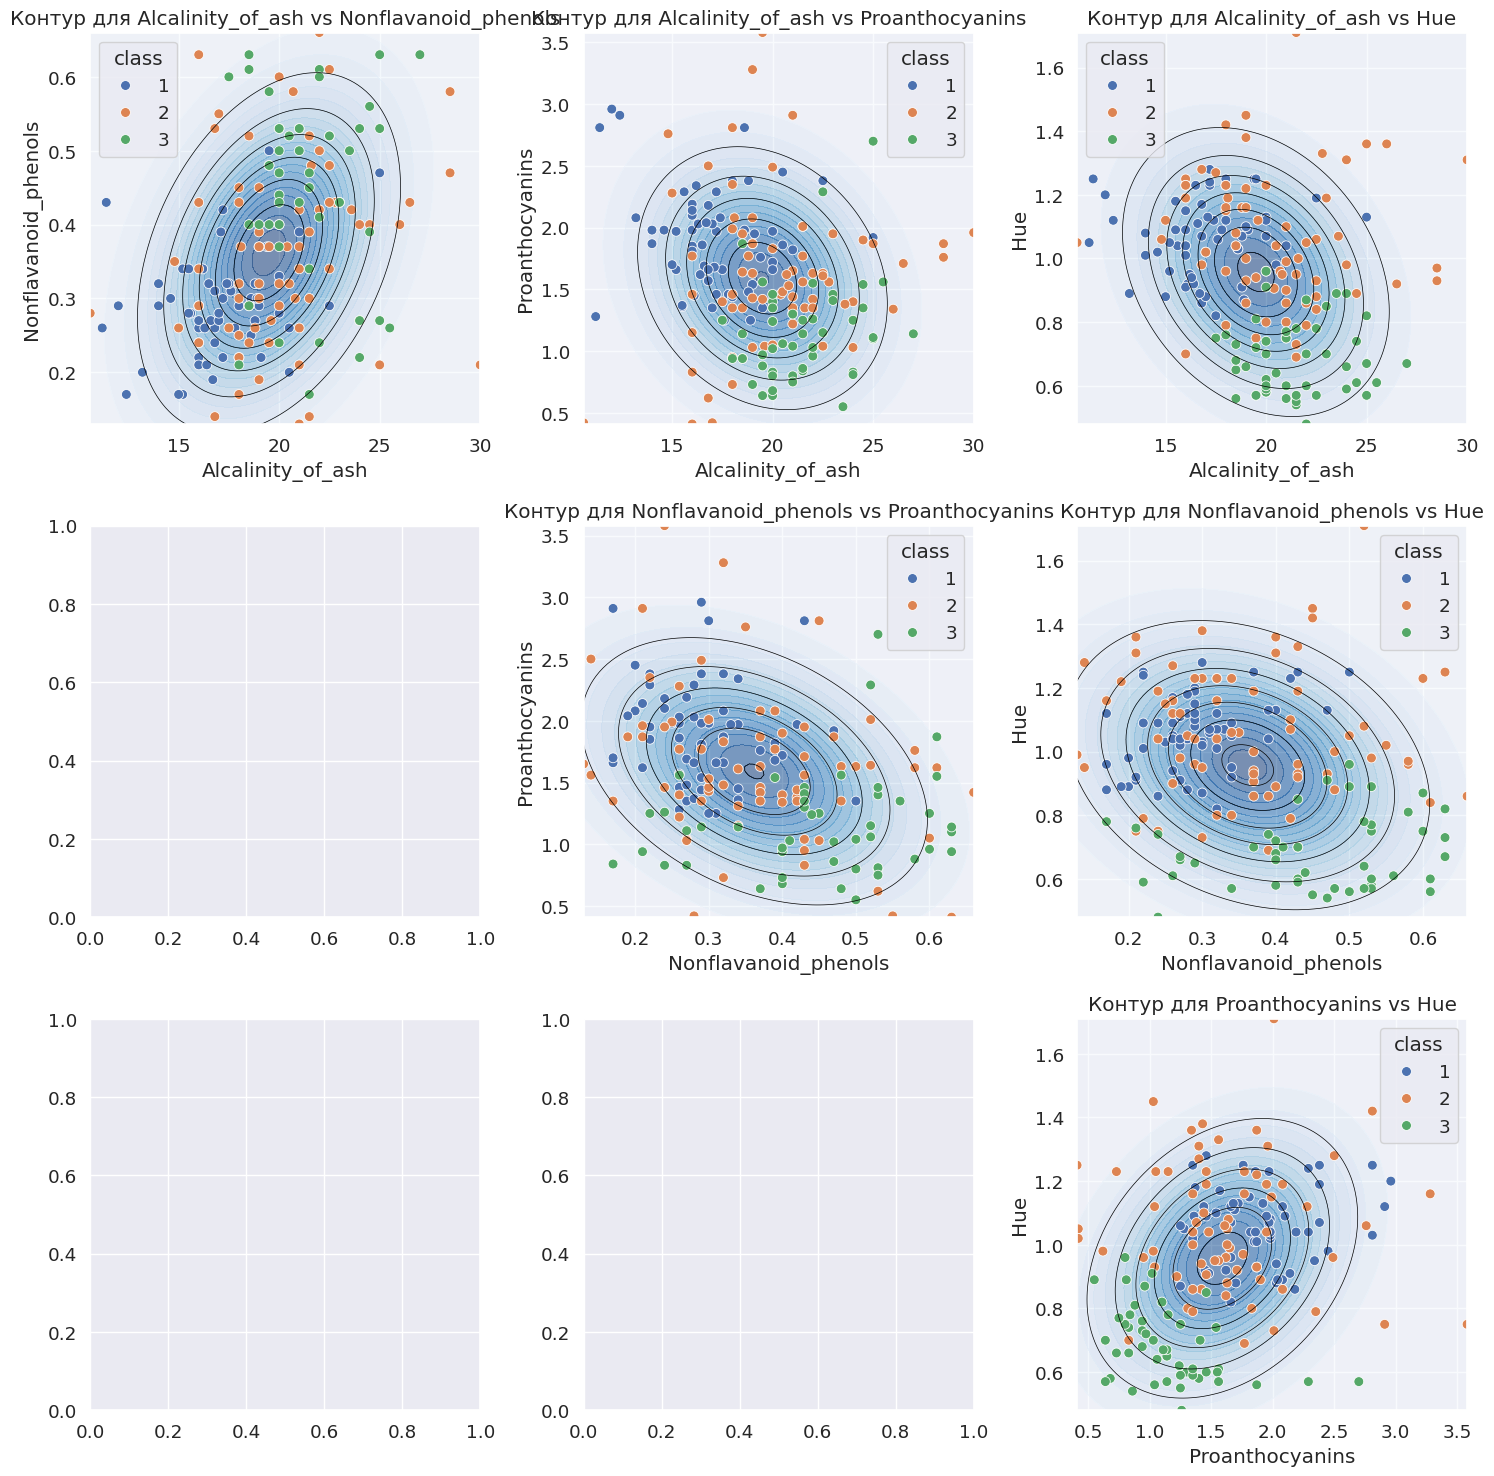

In [380]:
from scipy.stats import multivariate_normal

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

feature_names = X.columns
for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        ax = axes[i * 3 + j - 1]

        x = np.linspace(X[feature_names[i]].min(), X[feature_names[i]].max(), 100)
        y = np.linspace(X[feature_names[j]].min(), X[feature_names[j]].max(), 100)
        X1, Y1 = np.meshgrid(x, y)

        pos = np.dstack((X1, Y1))
        rv = multivariate_normal(a[[i, j]], sigma[np.ix_([i, j], [i, j])])
        Z = rv.pdf(pos)

        contour = ax.contourf(X1, Y1, Z, levels=20, cmap="Blues", alpha=0.5)
        ax.contour(X1, Y1, Z, colors="black", linewidths=0.5)

        sns.scatterplot(
            x=X[feature_names[i]],
            y=X[feature_names[j]],
            hue=data_y["class"],
            ax=ax,
            palette="deep",
            marker="o",
            s=50,
        )

        ax.set_xlabel(feature_names[i])
        ax.set_ylabel(feature_names[j])
        ax.set_title(f"Контур для {feature_names[i]} vs {feature_names[j]}")

plt.tight_layout()
plt.show()

**Вывод:** В работе мы экспериментально проверили, что найденная нами ОМП может хорошо потворять настоящее значение параметра распределения.

__________________
### Задача 2.

**1.** Загрузите <a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/">данные</a>, которые содержат набор медицинских исследований, проведенных в рамках исследования о наличии у пациента сахарного диабета. Пациенты относятся к индейскому племени Пима.

In [381]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Выведите описательные статистики (метод `describe`) для всех признаков.  Округлите до второго знака после запятой.

In [382]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [383]:
X.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** Можем наблюдать выбросы в столбце инусулин, тк различие между медианой и средним более чем в два раза, а значит выборка для этого столбца не симметрична. Также, возможно выбросы есть в DiabetesPedigreeFunction. В остальных случаях отклонения не превышают 15%.

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует таргеты, а ось `y` — значениям параметра. Используйте функцию `seaborn.boxplot`.

In [384]:
columns = X.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

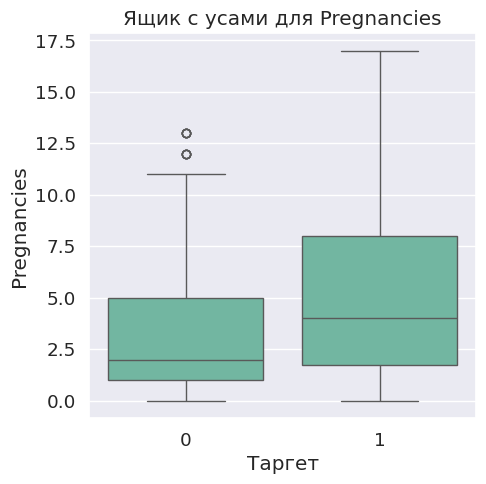

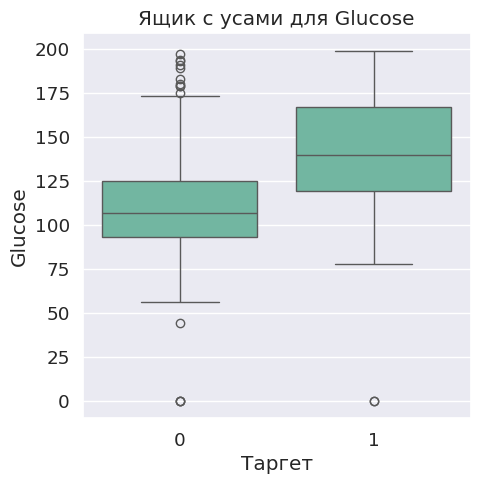

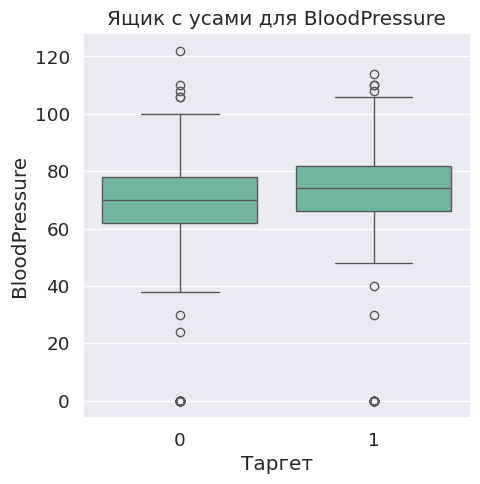

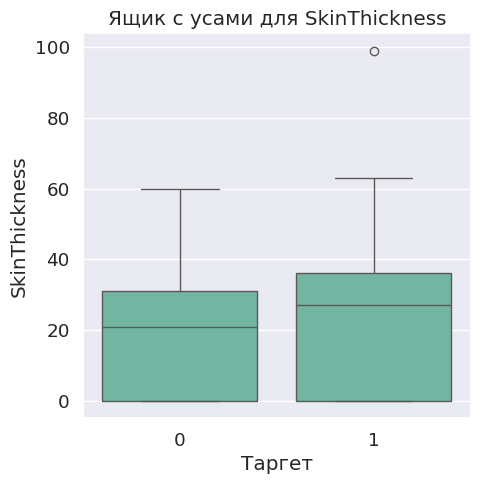

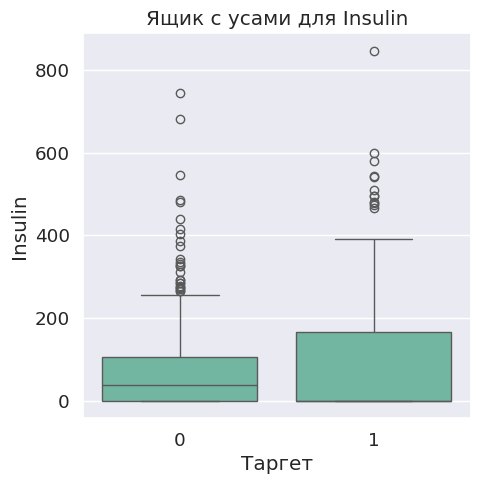

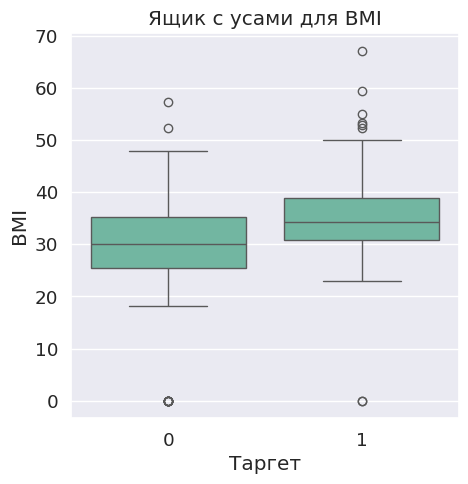

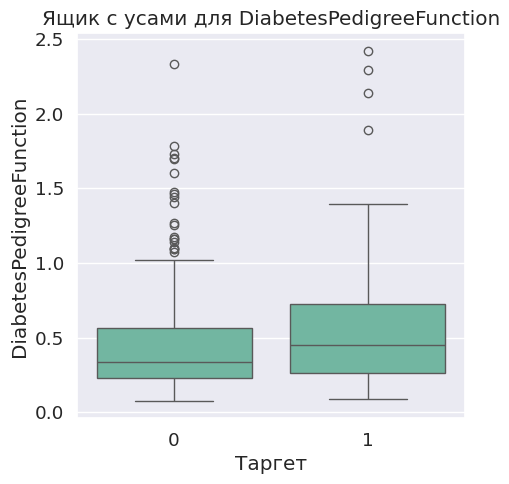

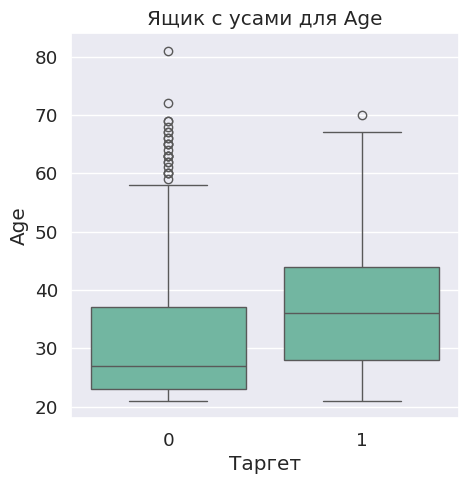

In [385]:
for column in columns:
    plt.figure(figsize=(5, 5))  
    sns.boxplot(x=y, y=X[column])  
    plt.title(f'Ящик с усами для {column}')  
    plt.xlabel('Таргет')  
    plt.ylabel(column)
    
    plt.show()  


Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:** Как видим, наши предсказания оправдались, больше всего выбросов имеет в столбце инсулин и DiabetesPedigreeFunction. Вместе с тем, не мало выбросов в колонке Ages, что изначально предсказано не было.

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;
- медиану средних Уолша.

Для реализации медианы средних Уолша без циклов обратите внимание на следующие **подсказки**:
1. Что будет, если вы сложите вектор-строку и вектор столбец одинакового размера?
2. Если вы правильно ответите на прошлый вопрос, вам пригодится `np.triu_indices_from`.

В качестве параметра с наибольшим количество выбросов возьмем Insulin

In [386]:
X_insulin = X["Insulin"].to_numpy()

X_mean = np.mean(X_insulin)
X_mu = np.median(X_insulin)
X_wolsh = np.median(
    ((X_insulin.reshape(1, -1) + X_insulin.reshape(-1, 1)) / 2).flatten()
)

In [387]:
print(f"Выборочное среднее: {X_mean:.2f}")
print(f"Выброчная медиана: {X_mu:.2f}")
print(f"Медиана средних Уолша: {X_wolsh:.2f}")

Выборочное среднее: 79.80
Выброчная медиана: 30.50
Медиана средних Уолша: 62.50


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** Видим, что медиана средних Уолша находится примерно на равном расстоянии от выборочного среднего и выборочной медианы. 

Не совпадение медианы и среднего, можно объяснить тем, что в выборке есть большие по модулю отрицательные значения, в то время как сама выборка состоит из значений близких к медиане.

Медиана Уолша позволяет исправить эффект от таких выбросов, еще больше усредняя выборку, и беря от нее медиану, что мы и наблюдаем на практике.

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.

**Вывод:**

Мы видим, что робастные оценки позволяют бороться с выбросами, предоставляя на оценку, которая лучше отражает реальность. 

Также в работе благодаря визуальному анализу мы смогли сначала по описанию датасета, а после и по графикам ящиков с усами установить, среди каких с.в. наблюдается большое количество выбросов.

______________
### Задача 3.

> *Указание.* При решении этой задачи посмотрите решения задач SP.2.3-4 и SP.3.1-2. Если потребуется, можно копировать код из своих решений этих задач или решений, которые выложены на вики.

Предлагается изучить свойства оценок параметра сдвига для распределения Коши, обладающего плотностью $$p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}.$$

> Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.
>
> В анализе данных такое распределение применяться для получения робастных процедур.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

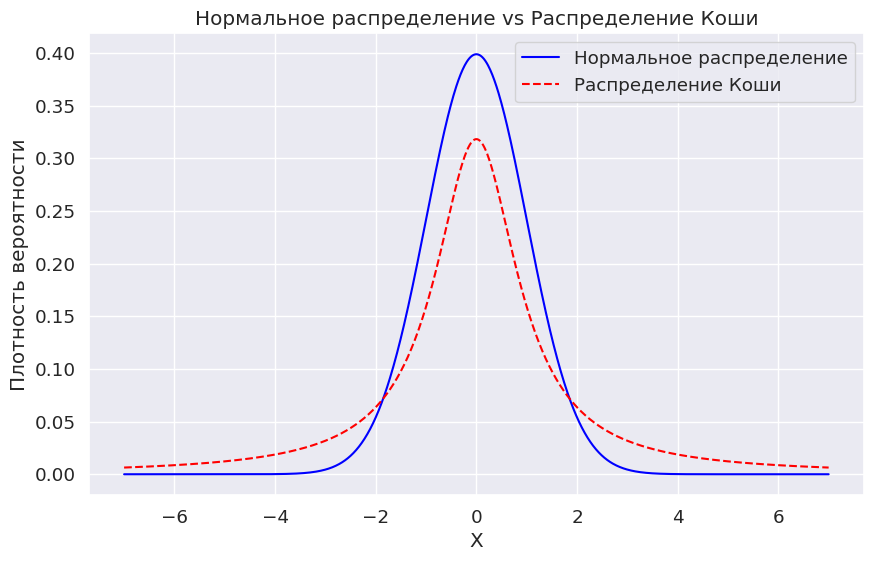

In [388]:
X = np.linspace(-7, 7, 1000)

y_normal = sps.norm(loc=0, scale=1).pdf(X)
y_cauchy = sps.cauchy(loc=0, scale=1).pdf(X)

plt.figure(figsize=(10, 6))
plt.plot(X, y_normal, label='Нормальное распределение', color='blue')
plt.plot(X, y_cauchy, label='Распределение Коши', color='red', linestyle='--')

plt.title('Нормальное распределение vs Распределение Коши')
plt.xlabel('X')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.show()

**Вывод:** Как видим, распределение Коши примерно повторяет нормальное, с тем отличием, что имеет более "тяжелые" хвосты.

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

Для начал вычислим дисперсию усеченного среднего.

С лекции:
$$
\sigma^2_\alpha = \frac{2}{(1-2\alpha)^2} \left(\int\limits_{0}^{u_{1-\alpha}}x^2 \cdot p_{0}(x)dx  + \alpha \cdot u_{1 - \alpha}^2 \right) = \frac{2}{(1-2\alpha)^2} \left(\frac{u_{1-\alpha} - \arctan{u_{1-\alpha}}}{\pi} + \alpha \cdot u_{1 - \alpha}^2 \right) 
$$


Где $u_{1 - \alpha}$ -- ($1 - \alpha$) -- квантиль распределения Коши

In [389]:
def get_sigma_cauchy_alpha(alpha):
    factor = 2 / (1 - 2 * alpha) ** 2
    u = sps.cauchy(loc=0, scale=1).ppf(1 - alpha)

    sigma2 = factor * ((u - np.arctan(u)) / np.pi + alpha * u ** 2)
    return sigma2

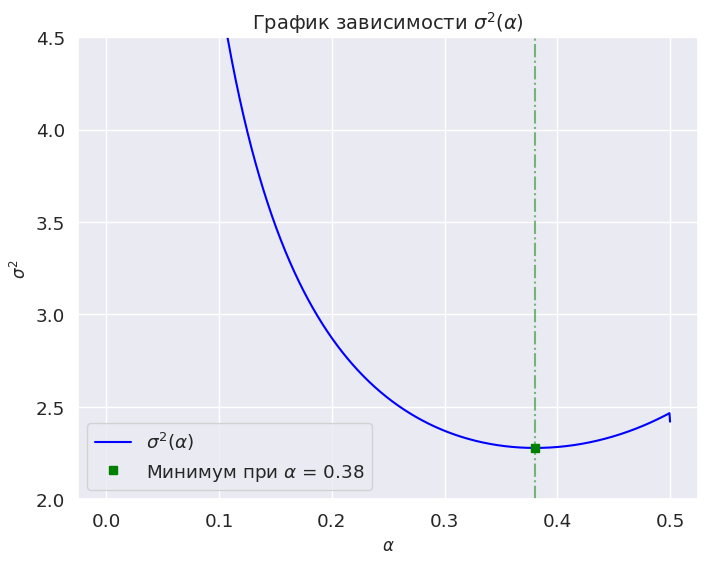

In [390]:
alpha_vals = np.linspace(1e-10, 1 / 2 - 1e-15, 1000)

sigma2_vals = get_sigma_cauchy_alpha(alpha_vals)
min_alpha = alpha_vals[np.argmin(sigma2_vals)]

plt.figure(figsize=(8, 6))
plt.plot(alpha_vals, sigma2_vals, color="blue", label=r"$\sigma^2(\alpha)$")
plt.plot(
    min_alpha,
    get_sigma_cauchy_alpha(min_alpha),
    color="g",
    marker="s",
    ls=" ",
    label=rf"Минимум при $\alpha$ = {min_alpha:.2f}",
)
plt.axvline(x=min_alpha, color="green", ls="dashdot", alpha=0.5)

plt.title(r"График зависимости $\sigma^2(\alpha)$", fontsize=14)
plt.xlabel(r"$\alpha$", fontsize=12)
plt.ylabel(r"$\sigma^2$", fontsize=12)
plt.ylim((2, 4.5))
plt.grid(True)

plt.legend()
plt.show()

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ и вывод:** 
$\alpha_{\min} = \arg \min_{\alpha} \sigma^2_{\alpha} \approx 0.38$

Мы смогли на практике построить график зависимости $\sigma^2_{\alpha}$ от $\alpha$, а также найти занчение $\alpha_0$ при котором усеченная асимтотическая дисперсия минимальная

**3.** 
Сгенерируйте выборку $X_1, ... X_{200}$ из стандартного распределения Коши и постройте доверительные интервалы для следующих случаев:

* точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$ (см. замечание ниже);
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя
    * выборочную медиану;
    * усеченное среднее порядка $\alpha$, на котором достигается минимум $\sigma^2_{\alpha}$;
    * выборочную медиану;
    * медиану средних Уолша;
    * любую асимптотически эффективную оценку.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 

*Замечания.*
1. Первый случай призван проиллюстрировать, что бывает, если используется неправильная модель. На практике вы никогда не знаете, из какого семейства распределений на самом деле получены данные.
2. Производите отладку кода на малых числах.
3. Если не успеваете до дедлайна, можете сократить количество вариантов, потеряв при этом некоторую часть баллов.


**Решение:**

In [391]:
def get_trimmed_mean(sample, alpha):
    N = len(sample)
    sample = sps.cauchy.rvs(size=N)
    sorted_sample = np.sort(sample)
    lower_bound = int(alpha * N)
    upper_bound = N - lower_bound
    trimmed_sample = sorted_sample[lower_bound:upper_bound]
    return np.mean(trimmed_sample)

In [392]:
def draw_confidence_interval(
    left,
    right,
    estimations=None,
    sample=None,
    ylim=(None, None),
    color_estimation="#FF3300",
    color_interval=["#00CC66"],
    color_sample="#0066FF",
    label_estimation=[" "],
    dots_flag=False,
    title_name=None,
    true_values=None,
    alpha=0.2,
):
    """
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    """
    plt.figure(figsize=(12, 8))

    once_flag = True
    for (
        tmp_left,
        tmp_right,
        tmp_color_interval,
        tmp_label_estimation,
    ) in zip(left, right, color_interval, label_estimation):
        size = sample.shape[0]
        x = np.arange(size) + 1

        plt.plot(x, tmp_right, ls="-", color=tmp_color_interval)
        plt.plot(x, tmp_left, ls="-", color=tmp_color_interval)
        plt.fill_between(
            x,
            tmp_left,
            tmp_right,
            color=tmp_color_interval,
            alpha=alpha,
            label=tmp_label_estimation,
        )

        if dots_flag and once_flag:
            plt.plot(
                x,
                sample,
                alpha=0.55,
                ls=" ",
                marker="o",
                color="orange",
                label="Выборка",
            )
        once_flag = False

    if true_values is not None:
        colors = ["r", "b", "g"]
        for i, true_val in enumerate(true_values):
            plt.axhline(
                y=true_val, color=colors[i], linestyle="--", label=r"Истинное значение"
            )

    plt.xlim((1, size + 1))
    plt.ylim(ylim)

    plt.xlabel("Размер выборки")
    plt.ylabel(r"Значение $\theta$")
    plt.legend()
    plt.title(title_name)
    plt.grid(True)
    plt.show()

In [393]:
N = 200
sample = sps.cauchy(loc=0, scale=1).rvs(size=N)


Доверительные интервалы будем искать по формуле:
$$
\left(\hat{\theta} - z_{\frac{1+\alpha}{2}} \frac{\sigma}{\sqrt{n}}, \hat{\theta} + z_{\frac{1+\alpha}{2}} \frac{\sigma}{\sqrt{n}} \right)
$$

Нормальное распределение

In [394]:
def get_normal_intervals(sample, alpha=0.95):
    """
    Возвращает доверительные интервалы для оценки методом выборочного среднего в нормальной модели
    """
    time = np.arange(len(sample)) + 1  
    z = sps.norm.ppf((1 + alpha) / 2)
    estimation_normal = np.cumsum(sample) / time 

    left_normal = estimation_normal - z / np.sqrt(time)
    right_normal = estimation_normal + z / np.sqrt(time)
    
    return left_normal, right_normal

left_normal, right_normal = get_normal_intervals(sample)


Усеченное среднее

In [395]:
def get_trimmed_intervals(sample, min_alpha, sigma_trimmed, alpha=0.95):
    """
    Возвращает доверительные интервалы для усечённого среднего порядка min_alpha
    """
    time = np.arange(len(sample)) + 1
    z = sps.norm.ppf((1 + alpha) / 2)
    estimation_trimmed = [sample[0]]

    for i in range(1, len(sample)):
        estimation_trimmed.append(get_trimmed_mean(sample[:i], min_alpha))
    
    estimation_trimmed = np.array(estimation_trimmed)

    left_trimmed = estimation_trimmed - z * sigma_trimmed / np.sqrt(time)
    right_trimmed = estimation_trimmed + z * sigma_trimmed / np.sqrt(time)

    return left_trimmed, right_trimmed



sigma_trimmed = np.sqrt(get_sigma_cauchy_alpha(min_alpha))
left_trimmed, right_trimmed = get_trimmed_intervals(sample, min_alpha, sigma_trimmed, alpha=0.95)

Выборочная медиана

In [396]:
def get_median_intervals(sample, sigma_median=np.pi / 2, alpha=0.95):
    """
    Возвращает доверительные интервалы для оценки медианой
    """
    time = np.arange(len(sample)) + 1
    z = sps.norm.ppf((1 + alpha) / 2)
    estimation_median = [sample[0]]

    for i in range(1, len(sample)):
        estimation_median.append(np.median(sample[:i]))
    
    estimation_median = np.array(estimation_median)

    left_median = estimation_median - z * sigma_median / np.sqrt(time)
    right_median = estimation_median + z * sigma_median / np.sqrt(time)

    return left_median, right_median

left_median, right_median = get_median_intervals(sample, alpha=0.95)

Медиана средних Уолша.

$\sigma^2_W = \frac{1}{12} \left(\frac{1}{\int\limits_{R}\rho^2_0(x)dx}\right)^2 = \frac{\pi^2}{3}$

In [397]:
def get_Wolsh_intervals(sample, sigma_Wolsh=np.pi / np.sqrt(3), alpha=0.95):
    """
    Возвращает доверительные интервалы для медианы средних Уолша
    """
    time = np.arange(len(sample)) + 1
    z = sps.norm.ppf((1 + alpha) / 2)
    estimation_Wolsh = [sample[0]]

    for i in range(1, len(sample)):
        tmp_sample = sample[:i]
        estimation_Wolsh.append(
            np.median(((tmp_sample.reshape(1, -1) + tmp_sample.reshape(-1, 1)) / 2).flatten())
        )

    estimation_Wolsh = np.array(estimation_Wolsh)

    left_Wolsh = estimation_Wolsh - z * sigma_Wolsh / np.sqrt(time)
    right_Wolsh = estimation_Wolsh + z * sigma_Wolsh / np.sqrt(time)

    return left_Wolsh, right_Wolsh


left_Wolsh, right_Wolsh = get_Wolsh_intervals(sample, alpha=0.95)

При помощи метода Ньютона найдем эффективную оценку. В качестве $\theta_0$ возьмем $\hat{\mu}$

Тогда асимтотически эффективная оценка примет вид:

$$
\hat{\theta_1} = \hat{\mu} + \left(\sum\limits_{i=1}^{n}\frac{X_i - \hat{\mu}}{1 + (X_i - \hat{\mu})^2} \right) \left(\sum\limits_{i=1}^{n}\frac{1 - (X_i - \hat{\mu})^2}{(1 + (X_i - \hat{\mu})^2)^2}\right)
$$

Тогда $\sigma^2_{eff} = 2$

In [398]:
def get_effective_estimation_intervals(sample, alpha=0.95):
    """
    Вычисляет эффективные оценки и доверительные интервалы для выборки из распределения Коши.

    :param sample: Массив выборки.
    :param alpha: Уровень значимости для доверительного интервала.
    :return: Левые и правые границы доверительного интервала.
    """
    z = sps.norm.ppf((1 + alpha) / 2)
    time = np.arange(len(sample)) + 1
    estimation_effective = [sample[0]]

    for i in range(1, len(sample)):
        tmp_sample = sample[:i]
        median = np.median(tmp_sample)

        factor_first = np.sum((tmp_sample - median) / (1 + (tmp_sample - median) ** 2))
        factor_second = np.sum((1 - (tmp_sample - median) ** 2) / (1 + (tmp_sample - median) ** 2) ** 2)

        estimation_effective.append(median + factor_first / factor_second)

    estimation_effective = np.array(estimation_effective)

    sigma_effective = np.sqrt(2)
    left_effective = estimation_effective - z * sigma_effective / np.sqrt(time)
    right_effective = estimation_effective + z * sigma_effective / np.sqrt(time)

    return left_effective, right_effective

left_effective, right_effective = get_effective_estimation_intervals(sample)

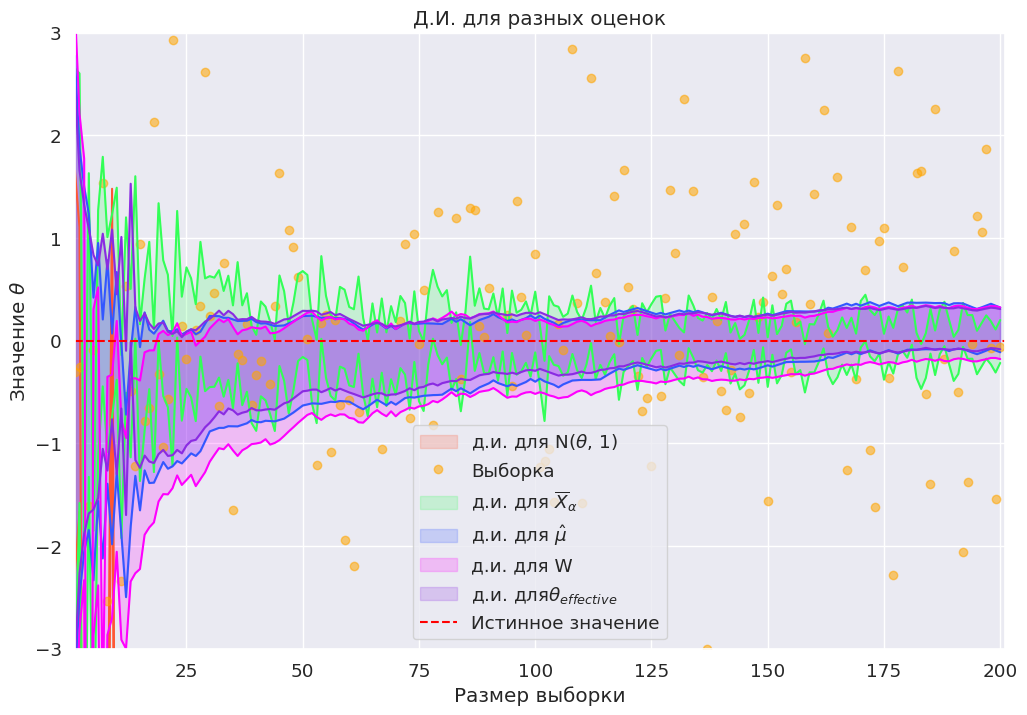

In [399]:
colors = ["#FF5733", "#33FF57", "#3357FF", "magenta", "#8A2BE2", "#FF1493"]

draw_confidence_interval(
    left=[left_normal, left_trimmed, left_median, left_Wolsh, left_effective],
    right=[right_normal, right_trimmed, right_median, right_Wolsh, right_effective],
    color_interval=colors,
    label_estimation=[
        r"д.и. для N($\theta$, 1)",
        r"д.и. для $\overline{X}_{\alpha}$",
        r"д.и. для $\hat{\mu}$",
        "д.и. для W",
        r"д.и. для$\theta_{effective}$",
    ],
    ylim=(-3, 3),
    sample=sample,
    title_name="Д.И. для разных оценок",
    dots_flag=True,
    alpha=0.2,
    true_values=[0],
)

**Вывод:** Как видим оценка для Д.И. в модели нормального распределения не является Д.И. для нашего $\theta$.

Заметим, что вид интервалов для Уолша, выборочной медианы и асимтотически эффективной оценки почти не отличаются.

Заметим, насколько хаотично ведет себя интервалдля усеченного среднего, это может говорить о не очень хорошей устойчивости к выбросам.

**4.** Сравните все исследуемые интервалы по величине доли покрытия истинного значения $\theta$, а также по средней длине интервала. Сравнение проведите для всех размеров выборки от 1 до 200 включительно. 

*Замечания.*
1. Производите отладку кода на малых числах.
2. Нужно выполнить достаточное количество семплирований выборок, не менее 1000.
3. Если код работает больше часа, разрешается проводить сравнение для размеров выборок по сетке с некоторым шагом, больше 1. При этом сделайте замеры времени выполнения ячеек с помощью `%%time`.
4. Если не успеваете до дедлайна, можете сократить количество перебираемых вариантов, потеряв при этом некоторую часть баллов.

**Решение:**

In [400]:
def get_coverage_rate(left, right, theta):
    """
    Вычисляет долю покрытия параметра доверительным интервалом.
    :param left, right: Массивы левых и правых границ доверительных интервалов
    :param theta: Значение параметра
    """

    covered = np.mean(
        (left <= theta) & (theta <= right),
        axis=-1,
    )

    lenght = np.mean(right - left)

    return (covered, lenght)

In [402]:
from joblib import Parallel, delayed


def process_sample(N, i, min_alpha, sigma_trimmed, param_value):
    sample = sps.cauchy(loc=0, scale=1).rvs(size=N)

    intervals = {
        "normal": get_normal_intervals(sample),
        "trimmed": get_trimmed_intervals(sample, min_alpha, sigma_trimmed, alpha=0.95),
        "median": get_median_intervals(sample, alpha=0.95),
        "wolsh": get_Wolsh_intervals(sample, alpha=0.95),
        "effective": get_effective_estimation_intervals(sample),
    }

    results = {}
    for method, (left, right) in intervals.items():
        coverage, length = get_coverage_rate(left, right, param_value)
        results[method] = (coverage, length)

    return results


def run_optimized(max_sample_size, n_samples, min_alpha, sigma_trimmed, param_value):
    coverage_rates = {
        "normal": np.zeros((max_sample_size, n_samples)),
        "trimmed": np.zeros((max_sample_size, n_samples)),
        "median": np.zeros((max_sample_size, n_samples)),
        "wolsh": np.zeros((max_sample_size, n_samples)),
        "effective": np.zeros((max_sample_size, n_samples)),
    }
    interval_lengths = {
        "normal": np.zeros((max_sample_size, n_samples)),
        "trimmed": np.zeros((max_sample_size, n_samples)),
        "median": np.zeros((max_sample_size, n_samples)),
        "wolsh": np.zeros((max_sample_size, n_samples)),
        "effective": np.zeros((max_sample_size, n_samples)),
    }

    for N in tqdm(range(1, max_sample_size + 1)):
        results = Parallel(n_jobs=-1)(
            delayed(process_sample)(N, i, min_alpha, sigma_trimmed, param_value)
            for i in range(n_samples)
        )

        for i, result in enumerate(results):
            for method in result.keys():
                coverage, length = result[method]
                coverage_rates[method][N - 1, i] = coverage
                interval_lengths[method][N - 1, i] = length

    return coverage_rates, interval_lengths


n_samples = 1000
max_sample_size = 200
param_value = 0
coverage_rates, interval_lengths = run_optimized(
    max_sample_size=max_sample_size,
    n_samples=n_samples,
    param_value=param_value,
    sigma_trimmed=sigma_trimmed,
    min_alpha=min_alpha,
)

100%|██████████| 200/200 [57:33<00:00, 17.27s/it]


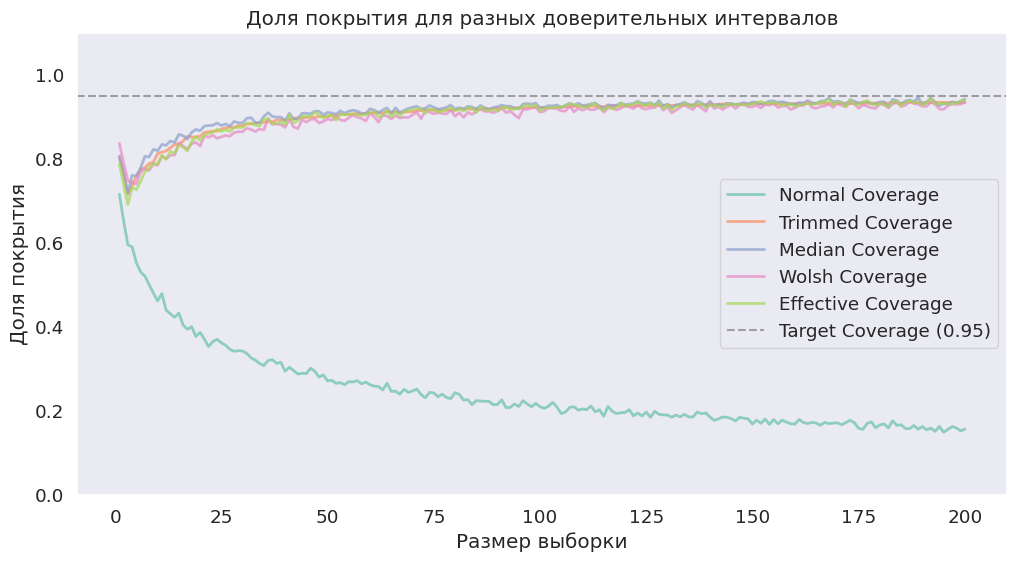

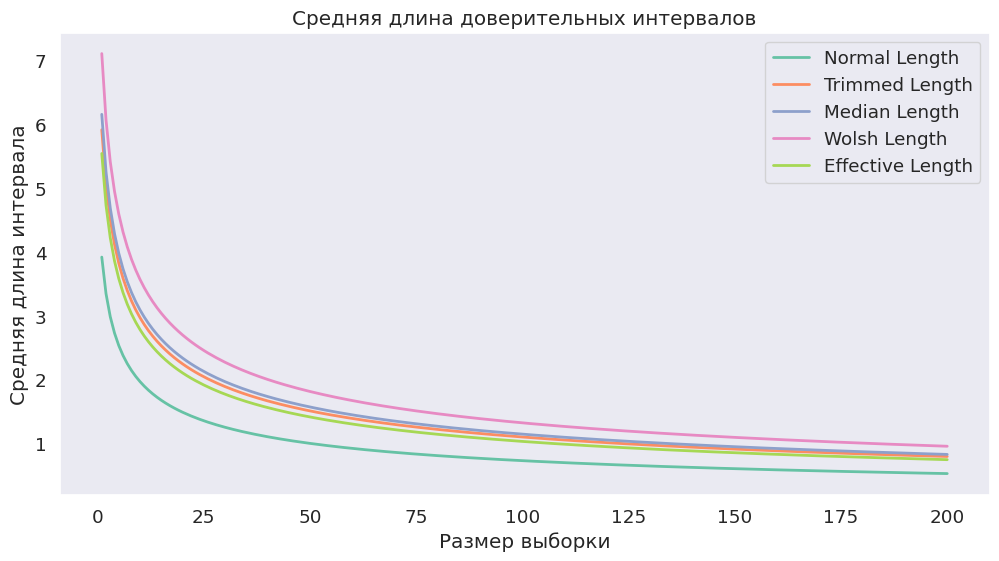

In [404]:
sample_sizes = np.arange(1, max_sample_size + 1)

plt.figure(figsize=(12, 6))
for interval_type in coverage_rates.keys():
    coverage_means = np.mean(coverage_rates[interval_type], axis=1)
    plt.plot(sample_sizes, coverage_means, lw=2, label=f'{interval_type.capitalize()} Coverage', alpha=0.7)
plt.axhline(y=0.95, color='gray', linestyle='--', alpha=0.7, label='Target Coverage (0.95)')
plt.xlabel('Размер выборки')
plt.ylabel('Доля покрытия')
plt.title('Доля покрытия для разных доверительных интервалов')
plt.legend()
plt.ylim(0, 1.1)
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
for interval_type in interval_lengths.keys():
    lengths_means = np.mean(interval_lengths[interval_type], axis=1)
    plt.plot(sample_sizes, lengths_means, lw=2, label=f'{interval_type.capitalize()} Length')
plt.xlabel('Размер выборки')
plt.ylabel('Средняя длина интервала')
plt.title('Средняя длина доверительных интервалов')
plt.legend()
plt.grid()
plt.show()

**Вывод:** 

Как видим покрытия для всех оценок, кроме нормального стремятся к 0.95, что говорит о том что мы корректно реализовали доверительные интервалы. Так как наше расределение не является нормальным, то не удивительно что покрытие для него убывает.

Вместе с тем, видим, что длины среднии длин доверетильных интервалов убывают, что также предсказуемо, в силу того что оценки получают больше информации от выборки.

Таким образом, в данной работе мы проанилизировали разные подходы использую различные робастные оценки. 

